In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load the dataset
file_path = 'C:\!Projects\DI-Bootcamp\Week7\Day5\diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()


<>:6: SyntaxWarning: invalid escape sequence '\!'
<>:6: SyntaxWarning: invalid escape sequence '\!'
C:\Users\kyana\AppData\Local\Temp\ipykernel_5472\3588101339.py:6: SyntaxWarning: invalid escape sequence '\!'
  file_path = 'C:\!Projects\DI-Bootcamp\Week7\Day5\diabetes_prediction_dataset.csv'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [3]:
# Count the positive and negative cases
positive_cases = df[df['diabetes'] == 1].shape[0]
negative_cases = df[df['diabetes'] == 0].shape[0]

In [4]:
# Split the data into features and target
X = df.drop(columns='diabetes')
y = df['diabetes']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(positive_cases, negative_cases), (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((8500, 91500), ((80000, 8), (20000, 8), (80000,), (20000,)))

In [8]:
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Split the data into features and target
X = df_encoded.drop(columns='diabetes')
y = df_encoded['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]


(array([[ 1.37871976, -0.28630923, -0.20355869, -0.38647449, -1.89245106,
         -1.42515661,  1.18734314, -0.01414355, -0.31885797, -0.20419058,
          3.10684138, -0.73511021, -0.26293117],
        [ 1.68986587, -0.28630923, -0.20355869, -0.41217229,  0.16216906,
          0.17059059,  1.18734314, -0.01414355, -0.31885797, -0.20419058,
         -0.32187031,  1.36034024, -0.26293117],
        [-0.17701075, -0.28630923, -0.20355869, -0.45298645, -1.42549194,
          0.48974003, -0.84221652, -0.01414355, -0.31885797,  4.8973855 ,
         -0.32187031, -0.73511021, -0.26293117],
        [-0.71040407, -0.28630923, -0.20355869, -1.27833936, -0.4915737 ,
         -0.93415747, -0.84221652, -0.01414355, -0.31885797, -0.20419058,
         -0.32187031, -0.73511021,  3.80327674],
        [ 0.84532644,  3.49272702, -0.20355869, -0.7885695 , -0.95853282,
         -1.30240682, -0.84221652, -0.01414355,  3.13619254, -0.20419058,
         -0.32187031, -0.73511021, -0.26293117]]),
 array([[-1.2

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.95905

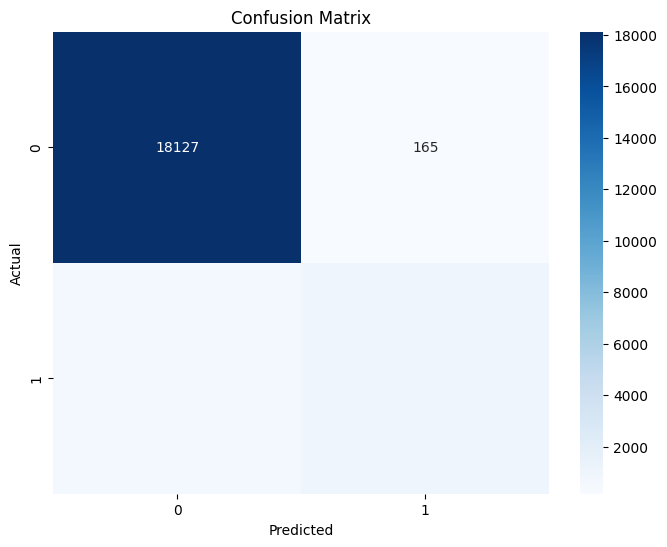

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



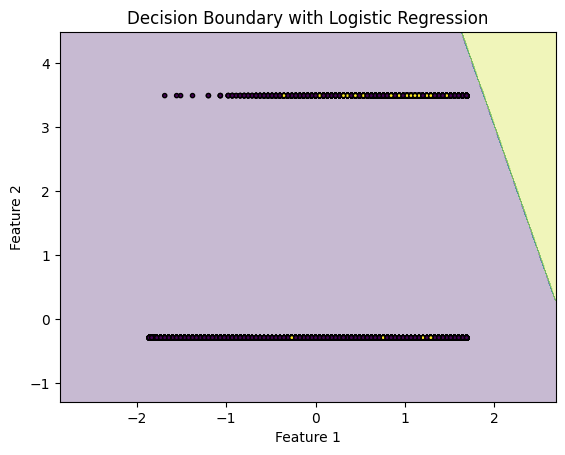

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='.')
    plt.title("Decision Boundary with Logistic Regression")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Use only two features for visualization
X_train_plot = X_train_scaled[:, :2]
y_train_plot = y_train

# Retrain the model with the selected features
model_plot = LogisticRegression(random_state=42)
model_plot.fit(X_train_plot, y_train_plot)

# Plot the decision boundary
plot_decision_boundary(X_train_plot, y_train_plot, model_plot)

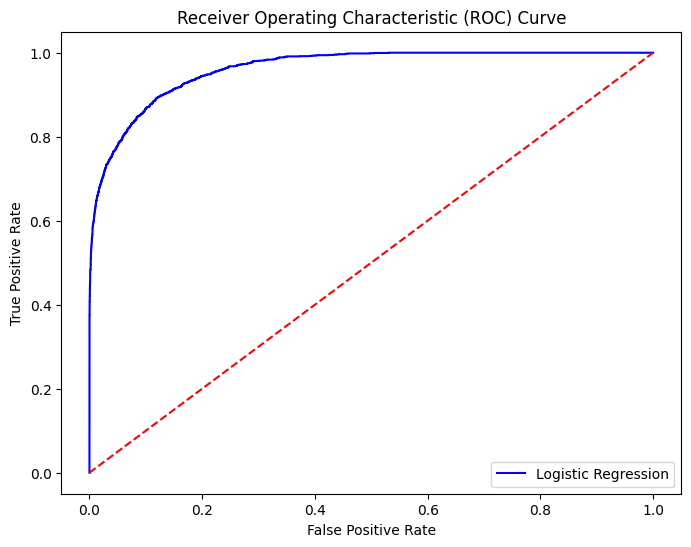

0.9616916553018916

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Retrain the model with all features
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate AUC
auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
auc